In [87]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/oliverphilcox/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['e']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [93]:
# Define elements to use:

used_els = ['Fe', 'He', 'Mg', 'Ne', 'O', 'Si'] # TNG elements but removing C and N for proto-solar corrections

In [94]:
# Load in full training data
full_input = '/mnt/store1/oliverphilcox/Variable_Time_Test_Predictions.npz'
dat=np.load(full_input,mmap_mode='r')
all_els = dat['elements']
params=dat['params']
abun=dat['abundances']

In [95]:
el_indices=np.zeros(len(used_els),dtype=int)
for e,el in enumerate(used_els):
    el_indices[e]=np.where(el==all_els)[0]

In [96]:
abun[4688]

array([-0.85530858, -0.20701451, -0.55749853, -0.26657836, -0.7409789 ,
       -0.48971569,  0.0338921 , -0.57709647, -0.49890417,  0.58366206,
       -0.3528619 , -0.60127908, -0.58366206, -0.56220364, -0.8235115 ,
       -0.84939525,  0.30691478, -0.60038612, -0.71812882, -0.6238087 ,
        0.25593055, -0.46564783, -0.41911924, -0.08409332, -0.91483206,
       -0.02663211, -0.61575141, -0.21702852, -0.84665262])

In [97]:
new_arr=abun[:,el_indices]

Save array

In [98]:
dat.close()

np.savez("/mnt/store1/oliverphilcox/TestPredictions6El.npz",abundances=new_arr,elements=used_els,params=params)

In [50]:
# Test input
dat2=np.load('/mnt/store1/oliverphilcox/TestPredictions6El.npz')

In [51]:
ab=dat2.f.abundances

In [52]:
bmap=np.zeros(len(ab),dtype=int)
for i,a in enumerate(ab):
    if a[0]!=0:
        bmap[i]=1

In [56]:
np.sum(bmap)/len(bmap)*100

99.77000000000001

In [53]:
good_par=params[np.where(bmap==1)]
ints=np.random.randint(0,len(good_par),1000)

We note that $\sim0.2\%$ of the data is dodgy here, which results in empty arrays, indicating that the model could not be run for this set of parameters.

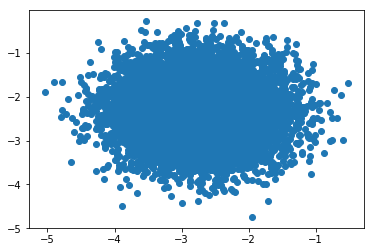

In [54]:
plt.scatter(good_par[:,1],good_par[:,0])